This tutorial's purpose is to introduce people to the [2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE](https://github.com/CSSEGISandData/COVID-19) and how to explore it using some foundational packages in the Scientific Python Data Science stack.

It is not intended to encourage people to create & publish their own data visualizations. In fact, as [this thoughtful essay](https://medium.com/nightingale/ten-considerations-before-you-create-another-chart-about-covid-19-27d3bd691be8) makes clear, in many cases it is irresponsible to publish amateur visualizations, which at best will dilute those that experts with domain expertise are publishing. We won't be making any predictions or doing any statistical modelling, although we may look critically at some other models.

Dashboards such as these inpsired me to put this material together, in order to show people how to dive into the data:

- [Covid-19: active cases and extrapolation](https://covid19-dash.github.io/) by Gaël Varoquaux, Emmanuelle Gouillart, Russell Poldrack, and Guillaume Lemaitre
- [NYC Covid-19 data dashboard](https://smarquez.shinyapps.io/covid_nys_dashboard/) by Sue Marquez
- All of [these dashboards](https://covid19dashboards.com/) contributed to by many and powered by the work of Hamel Husain.


There's also a well-known and evolving figure from the Financial Times, which is being circulated. [This](https://twitter.com/DrDenaGrayson/status/1241143463925645319/photo/1) is an example from several weeks ago.

But be careful when interpreting plots, numbers, and reports of the *known* number of cases of COVID-19 <-- this is a function of many things that are *not* the total number of cases, such as the number of available tests. The limiting case is when there are zero tests, there are zero known cases; then if many tests become available, there'll seem to be a huge spike in number of cases, even if there hasn't been such a spike. The number of reported known cases is also a function of any given government's willingness (or lakc thereof) to report their actual findings. We can think of this in relation to NNT's conception of [Wittgenstein's ruler](https://twitter.com/DellAnnaLuca/status/1244555177807380480).

We'll be visualizing number of known cases, number of deaths, and number of recoveries around the world. Note that there are interesting ways to report these numbers that aren't quite visualization per se. Ryan Struyck of CNN, for example, has been leveraging the affordances of tweets and twitter do display such data compellingly:

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Reported US coronavirus cases<br><br>3/17: 6,135<br>3/18: 8,760<br>3/19: 13,229<br>3/20: 18,763<br>3/21: 25,740<br>3/22: 34,276<br>3/23: 42,663<br>3/24: 52,976<br>3/25: 65,273<br>3/26: 82,135<br>3/27: 101,295<br>3/28: 121,176<br>3/29: 139,773<br>3/30: 160,377<br>3/31: 185,469<br>4/1: 211,740<br>4/2: 245,070<br>4/3: 277,953<br>Now: 311,544</p>&mdash; Ryan Struyk (@ryanstruyk) <a href="https://twitter.com/ryanstruyk/status/1246624017278263296?ref_src=twsrc%5Etfw">April 5, 2020</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

**Discuss:** We're about to dive into the dataset, but first let's chat a bit about why we're looking at the Hopkins dataset and what other options could.

## GET THE DATA

First thing's first. Let's import the necessary packages from the SciPy stack and get [that data](https://github.com/CSSEGISandData/COVID-19).

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set style & figures inline
sns.set()
%matplotlib inline

In [2]:
# Data urls
confirmed_cases_data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
death_cases_data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recovery_cases_data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

# Import datasets as pandas dataframes
raw_data_confirmed = pd.read_csv(confirmed_cases_data_url)
raw_data_deaths = pd.read_csv(death_cases_data_url)
raw_data_recovered = pd.read_csv(recovery_cases_data_url)

We'll first check out the confirmed cases data by looking at the head of the dataframe:


In [3]:
raw_data_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,94,110,110,120,170,174,237,273,281,299
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,174,186,197,212,223,243,259,277,304,333
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,367,409,454,511,584,716,847,986,1171,1251
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,224,267,308,334,370,376,390,428,439,466
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,4,5,7,7,7,8,8,8,10


**Discuss:** What do you see here?
We can also see a lot about the data by using the `.info()` and `.describe()` dataframe methods:

In [4]:
raw_data_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 78 columns):
Province/State    81 non-null object
Country/Region    259 non-null object
Lat               259 non-null float64
Long              259 non-null float64
1/22/20           259 non-null int64
1/23/20           259 non-null int64
1/24/20           259 non-null int64
1/25/20           259 non-null int64
1/26/20           259 non-null int64
1/27/20           259 non-null int64
1/28/20           259 non-null int64
1/29/20           259 non-null int64
1/30/20           259 non-null int64
1/31/20           259 non-null int64
2/1/20            259 non-null int64
2/2/20            259 non-null int64
2/3/20            259 non-null int64
2/4/20            259 non-null int64
2/5/20            259 non-null int64
2/6/20            259 non-null int64
2/7/20            259 non-null int64
2/8/20            259 non-null int64
2/9/20            259 non-null int64
2/10/20           259 non-null int64
2/

In [5]:
raw_data_confirmed.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
count,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,...,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000
mean,21.367016,22.529732,2.142857,2.525097,3.633205,5.536680,8.177606,11.301158,21.536680,23.806950,...,2044.752896,2290.698842,2550.988417,2780.374517,3020.714286,3310.760618,3600.791506,3911.803089,4231.339768,4623.185328
std,24.868461,71.121830,27.644596,27.743746,34.537260,48.065701,67.169283,90.498630,222.113739,223.463074,...,9773.354623,10945.887963,12236.732606,13445.793363,14766.573641,16395.290595,18024.945431,19879.358202,21868.401708,24162.383257
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.270000,-21.031300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.500000,11.000000,11.000000,13.500000,15.000000,16.000000,19.000000,21.000000,22.000000,22.500000
50%,23.634500,20.902977,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,96.000000,102.000000,119.000000,135.000000,141.000000,147.000000,172.000000,183.000000,194.000000,201.000000
75%,41.178850,82.625000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,495.000000,565.500000,616.500000,650.000000,691.000000,729.500000,787.500000,897.000000,965.000000,1004.500000
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,83836.000000,101657.000000,121478.000000,140886.000000,161807.000000,188172.000000,213372.000000,243453.000000,275586.000000,308850.000000


**Discuss:** What do the above tell us?

## Getting the numbers for each country

Look at the head (or tail!) of our dataframe again and notice that each row is the data for a particular *province* or *state* of a given country:

In [6]:
raw_data_confirmed.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
254,NaN,Burundi,-3.373100,29.918900,0,0,0,0,0,0,...,0,0,0,0,0,2,2,3,3,3
255,NaN,Sierra Leone,8.460555,-11.779889,0,0,0,0,0,0,...,0,0,0,0,0,1,2,2,2,4
256,"Bonaire, Sint Eustatius and Saba",Netherlands,12.178400,-68.238500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2
257,NaN,Malawi,-13.254308,34.301525,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,3,4
258,Falkland Islands (Islas Malvinas),United Kingdom,-51.796300,-59.523600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


We want the numbers for each country, though! So the way to think about this is, for each country, we want to take all the rows (*regions/provinces*) that correspond to that country and add up the numbers for each. To put this in data-analytic-speak, we want to **group by** the country column and sum up all the values for the other columns.

This is a common pattern in data analysis that we humans have been using for centuries. Interestingly, it was only formalized in 2011 by Hadley Wickham in his seminal paper [The Split-Apply-Combine Strategy for Data
Analysis](https://www.jstatsoft.org/article/view/v040i01). The pattern we're discussing is now called Split-Apply-Combine and, in the case at hand, we

- Split the data into new datasets for each country,
- Apply the function of "sum" for each new dataset (that is, we add/sum up the values for each column), and
- Combine these datasets into a new dataframe.

The `pandas` API has the `groupby` method, which allows us to do this. So let's do it!

**Side note:** For more on split-apply-combine and `pandas` check out [my post here](https://www.datacamp.com/community/tutorials/pandas-split-apply-combine-groupby).

In [7]:
# Group by region (also drop 'Lat', 'Long' as it doesn't make sense to sum them here)
confirmed_country = raw_data_confirmed.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)
confirmed_country.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,94,110,110,120,170,174,237,273,281,299
Albania,0,0,0,0,0,0,0,0,0,0,...,174,186,197,212,223,243,259,277,304,333
Algeria,0,0,0,0,0,0,0,0,0,0,...,367,409,454,511,584,716,847,986,1171,1251
Andorra,0,0,0,0,0,0,0,0,0,0,...,224,267,308,334,370,376,390,428,439,466
Angola,0,0,0,0,0,0,0,0,0,0,...,4,4,5,7,7,7,8,8,8,10


So each row of our new dataframe `confirmed_country` is a time series of the number of confirmed cases for each country. Cool! 
Now a dataframe has an associated object called an Index, which is essentially a set of unique indentifiers for each row. Let's check out the index of `confirmed_country`:

In [8]:
confirmed_country.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Ukraine', 'United Arab Emirates', 'United Kingdom', 'Uruguay',
       'Uzbekistan', 'Venezuela', 'Vietnam', 'West Bank and Gaza', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='Country/Region', length=181)

It's indexed by `Country/Region`. That's pretty cool **but** if we index by date **instead**, it will allow us to produce some visualizations almost immediately. This is a nice aspect of the `pandas` API: you can make basic visualizations with it and, if your index consists of DateTimes, it knows that you're plotting time series and plays nicely with them.
To make the index the set of dates, notice that the column names are the dates. To turn column names into the index, we essentially want to make the columns the rows (and the rows the columns). This corresponds to taking the transpose of the dataframe:

In [9]:
confirmed_country = confirmed_country.transpose()
confirmed_country.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,2,0,0,0


Let's have a peek at our index to see whether it actually consists of DateTimes:

In [10]:
confirmed_country.index

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20',
       '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20'],
      dtype='object')

Oh no! `dtype='object'` <-- this sucks: these are strings :/ But never fear! Using some wicked `pandas` foo, we can turn it into a DateTimeIndex:

In [12]:
# Set index as DateTimeIndex
datetime_index = pd.DatetimeIndex(confirmed_country.index)
confirmed_country.set_index(datetime_index, inplace=True)
# Check out index
confirmed_country.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
      

Boom! Now we have a DateTimeIndex and Countries for columns, we can use the dataframe plotting method to visualize the time series of confirmed number of cases by country. As there are so many coutries, we'll plot a subset of them:

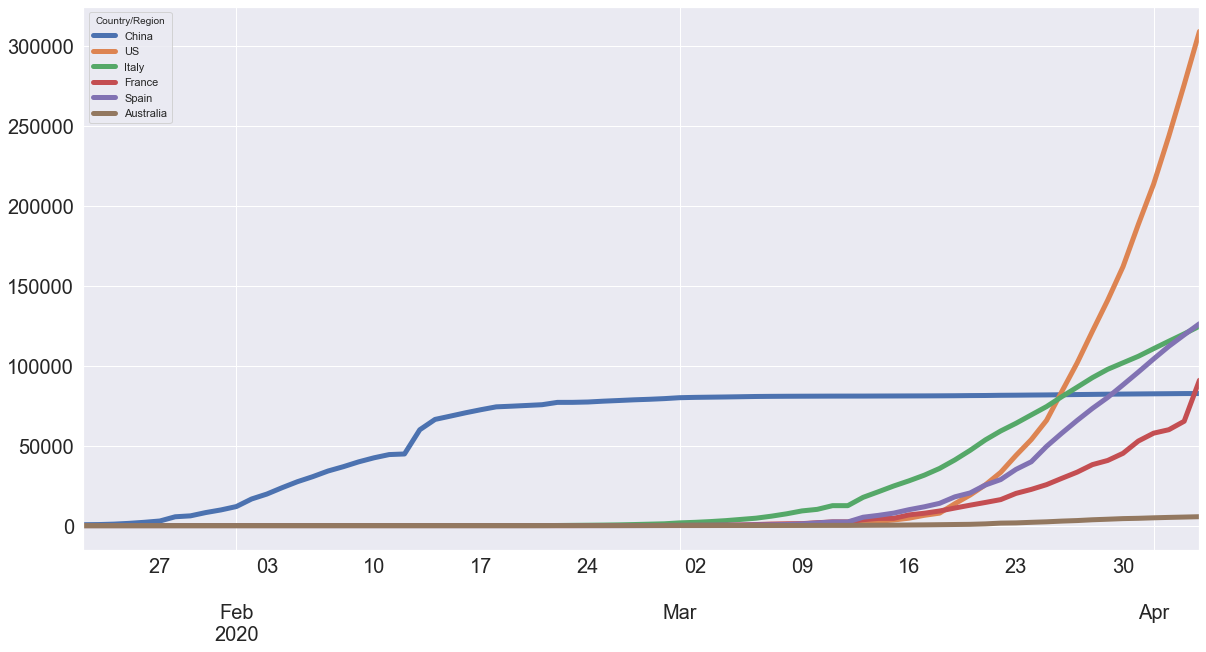

In [17]:
# Plot time series of several countries of interest
poi = ['China', 'US', 'Italy', 'France', 'Spain', 'Australia']
confirmed_country[poi].plot(figsize=(20,10), linewidth=5, fontsize=20);

Let's label our axes and give the figure a title:

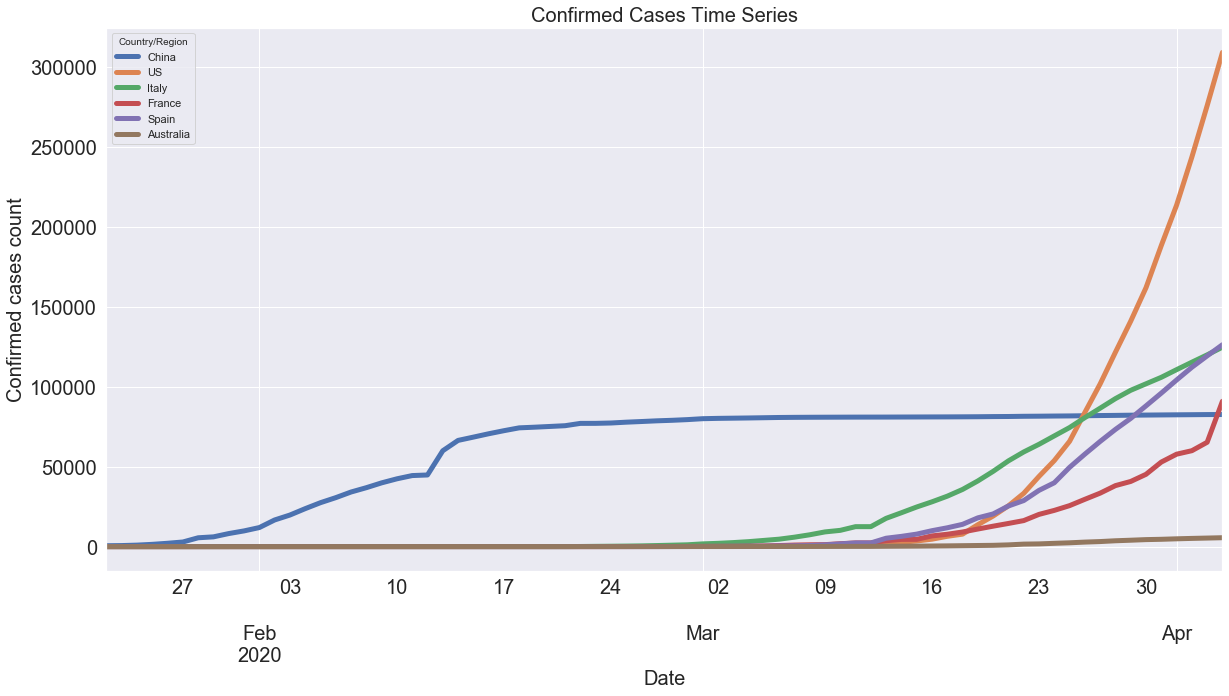

In [19]:
# Plot time series of several countries of interest
confirmed_country[poi].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Confirmed cases count', fontsize=20);
plt.title('Confirmed Cases Time Series', fontsize=20);

Let's do this again but make the y-axis logarithmic (we'll discuss why in a tick):

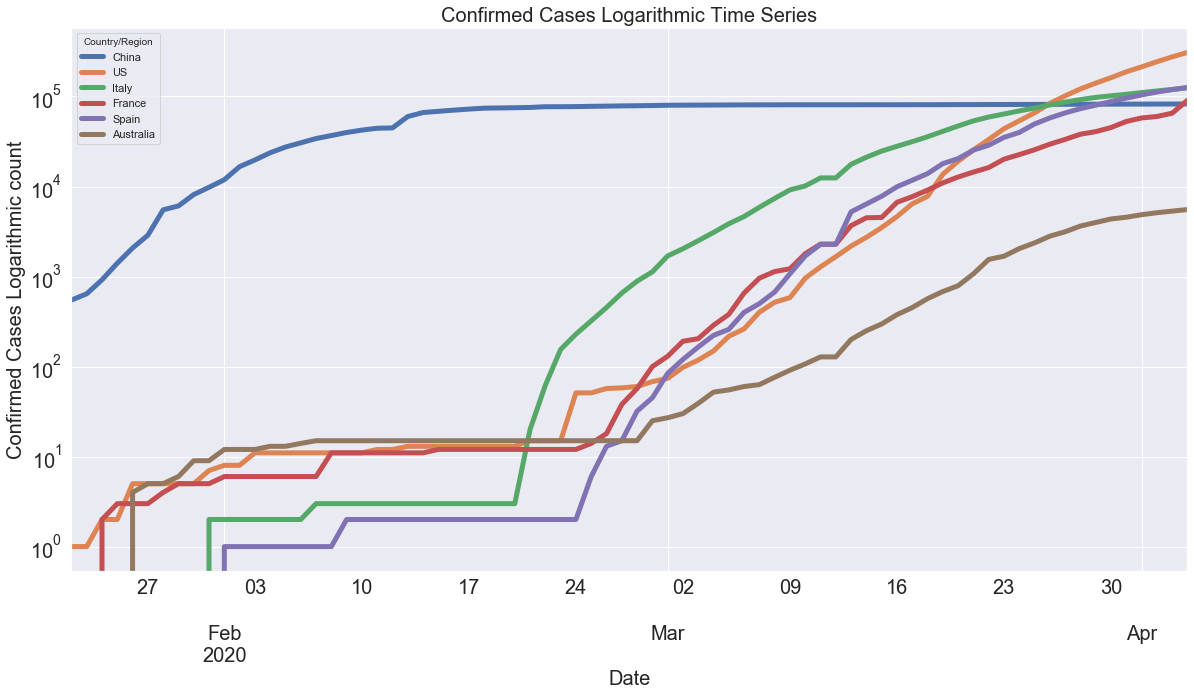

In [20]:
# Plot time series of several countries of interest
confirmed_country[poi].plot(figsize=(20,10), linewidth=5, fontsize=20, logy=True)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Confirmed Cases Logarithmic count', fontsize=20);
plt.title('Confirmed Cases Logarithmic Time Series', fontsize=20);

**Discuss:** Why do we plot with a log y-axis? How do we interpret the log plot?
**Key points:** 
- If a variable takes on values over several orders of magnitude (e.g. in the 10s, 100s, and 1000s), we use a log axes so that the data is not all crammed into a small region of the visualization.
- If a curve is approximately linear on a log axis, then its approximately exponential growth and the gradient/slope of the line tells us about the exponent.


## Number of deaths by country

As we did above for `raw_data_confirmed`, let's check out the head and the info of the `raw_data_deaths` dataframe:

In [21]:
raw_data_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,4,4,4,4,4,4,4,6,6,7
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,6,8,10,10,11,15,15,16,17,20
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,25,26,29,31,35,44,58,86,105,130
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,3,3,3,6,8,12,14,15,16,17
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,2,2,2,2,2,2,2


In [22]:
raw_data_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 78 columns):
Province/State    81 non-null object
Country/Region    259 non-null object
Lat               259 non-null float64
Long              259 non-null float64
1/22/20           259 non-null int64
1/23/20           259 non-null int64
1/24/20           259 non-null int64
1/25/20           259 non-null int64
1/26/20           259 non-null int64
1/27/20           259 non-null int64
1/28/20           259 non-null int64
1/29/20           259 non-null int64
1/30/20           259 non-null int64
1/31/20           259 non-null int64
2/1/20            259 non-null int64
2/2/20            259 non-null int64
2/3/20            259 non-null int64
2/4/20            259 non-null int64
2/5/20            259 non-null int64
2/6/20            259 non-null int64
2/7/20            259 non-null int64
2/8/20            259 non-null int64
2/9/20            259 non-null int64
2/10/20           259 non-null int64
2/

It seems to be structured similarly to `raw_data_confirmed`. I have checked it out in detail and can confirm that it is! This is good data design as it means that users like can explore, munge, and visualize it in a fashion analogous to the above. Can you remember what we did? We

- Split-Apply-Combined it (and dropped 'Lat'/'Long'),
- Transposed it,
- Made the index a DateTimeIndex, and
- Visualized it (linear and semi-log).

Let's now do the first three steps here for `raw_data_deaths` and see how we go:



In [46]:
# Split-Apply-Combine
deaths_country = raw_data_deaths.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)

# Transpose
deaths_country = deaths_country.transpose()

# Set index as DateTimeIndex
datetime_index = pd.DatetimeIndex(deaths_country.index)
deaths_country.set_index(datetime_index, inplace=True)

# Check out head
deaths_country.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Check out the index
deaths_country.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
      

Looks good to me. So let's do some data vis up in here:

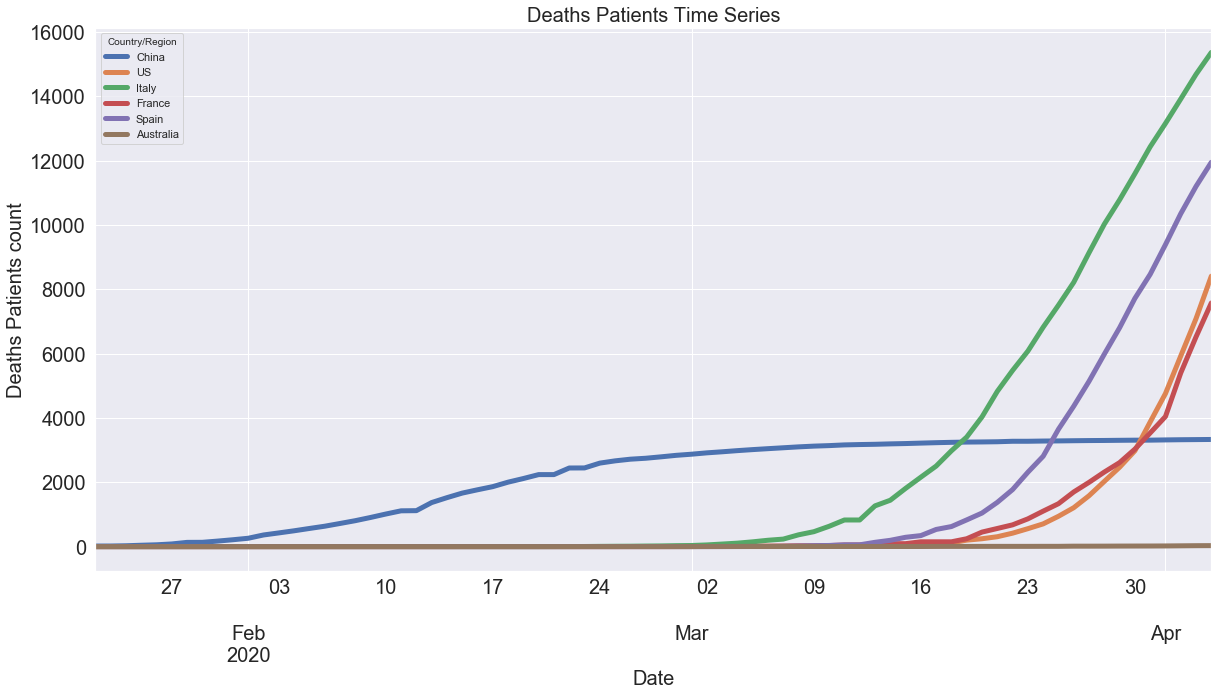

In [27]:
# Plot time series of several countries of interest
deaths_country[poi].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Deaths Patients count', fontsize=20);
plt.title('Deaths Patients Time Series', fontsize=20);

Now on a semi-log plot:

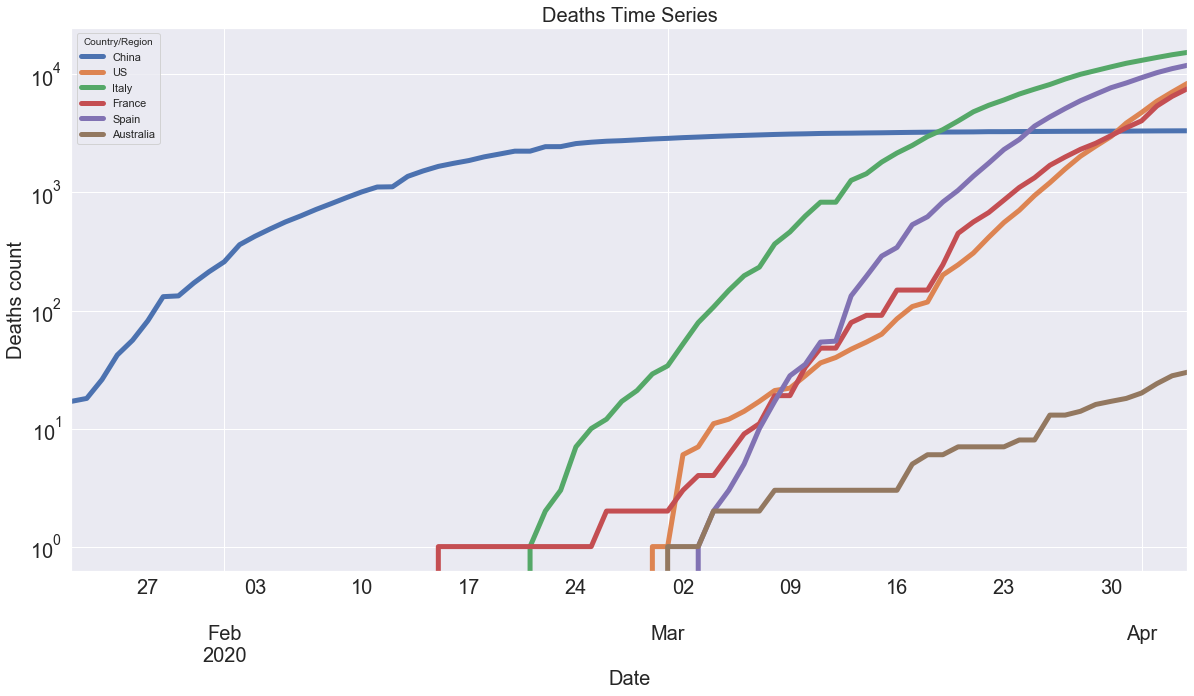

In [29]:
# Plot time series of several countries of interest
deaths_country[poi].plot(figsize=(20,10), linewidth=5, fontsize=20, logy=True)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Deaths count', fontsize=20);
plt.title('Deaths Time Series', fontsize=20);

## Aligning growth curves to start with day of number of known deaths = 25

To compare what's happening in different countries, we can align each countries growth curves to all start on the day when the number of known deaths = 25, such as reported in the first figure [here](https://www.nytimes.com/interactive/2020/03/21/upshot/coronavirus-deaths-by-country.html):

**WIP:** Let's take a different approach to the above in order to turn values < 25 into NaNs (explain this, HBA):

In [83]:
# Group by region
deaths_country = raw_data_deaths.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)
#df = deaths_country.transpose()
# Melt data so that it is long
deaths = deaths_country.reset_index().melt(id_vars='Country/Region', var_name='date')
#
deaths.loc[(deaths.value < 25),'value'] = None
# Pivot data to wide & index by date
deaths = deaths.pivot(index='date', columns='Country/Region', values='value')
# Set index as DateTimeIndex
datetime_index = pd.DatetimeIndex(df.index)
deaths.set_index(datetime_index, inplace=True)

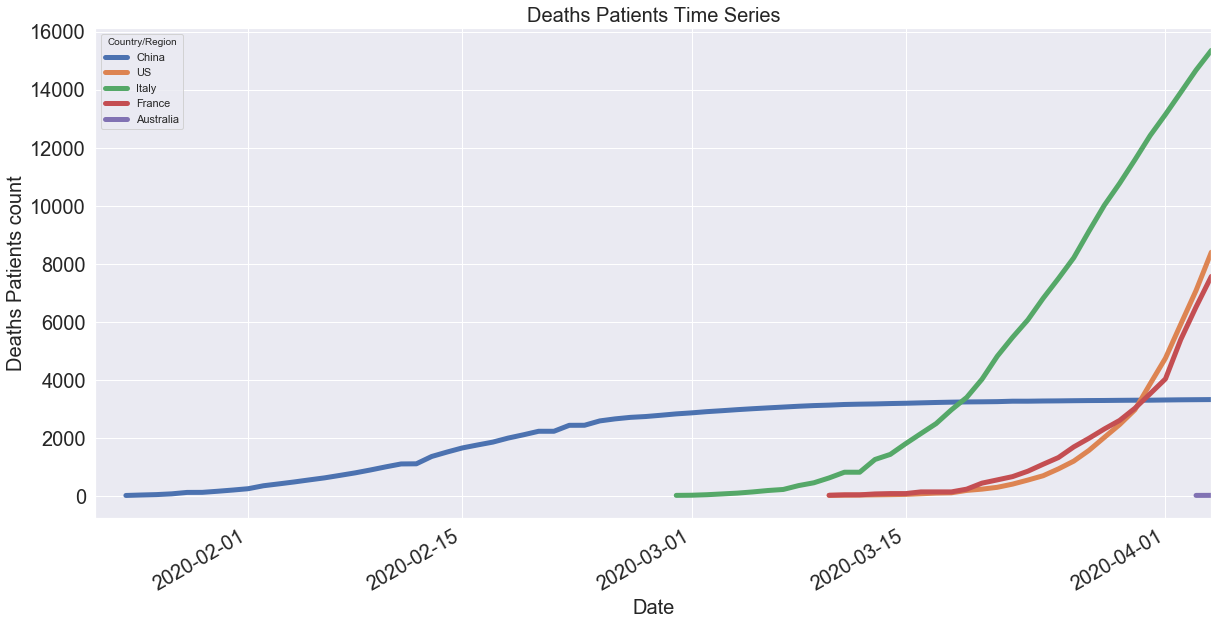

In [84]:
# Plot time series of several countries of interest
poi = ['China', 'US', 'Italy', 'France', 'Australia']
deaths[poi].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Deaths Patients count', fontsize=20);
plt.title('Deaths Patients Time Series', fontsize=20);

In [85]:
# Drop columns that are all NaNs (i.e. countries that haven't yet reached 25 deaths)
deaths.dropna(axis=1, how='all', inplace=True)
deaths.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 74 entries, 2020-01-22 to 2020-04-04
Data columns (total 53 columns):
Algeria               10 non-null float64
Argentina             5 non-null float64
Australia             2 non-null float64
Austria               12 non-null float64
Belgium               16 non-null float64
Brazil                14 non-null float64
Canada                13 non-null float64
Chile                 1 non-null float64
China                 72 non-null float64
Colombia              2 non-null float64
Czechia               5 non-null float64
Denmark               12 non-null float64
Dominican Republic    8 non-null float64
Ecuador               12 non-null float64
Egypt                 9 non-null float64
Finland               1 non-null float64
France                26 non-null float64
Germany               18 non-null float64
Greece                10 non-null float64
Hungary               2 non-null float64
India                 7 non-null float64
Indon

In [86]:
# sort index, drop date column
deaths = deaths.sort_index()
deaths = deaths.reset_index().drop(['date'], axis=1)
deaths.head()

Country/Region,Algeria,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,China,Colombia,...,San Marino,Saudi Arabia,Serbia,Spain,Sweden,Switzerland,Turkey,US,Ukraine,United Kingdom
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
# shift
deaths = deaths.apply(lambda x: x.shift(-x.first_valid_index()))
deaths.head()

Country/Region,Algeria,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,China,Colombia,...,San Marino,Saudi Arabia,Serbia,Spain,Sweden,Switzerland,Turkey,US,Ukraine,United Kingdom
0,25.0,27.0,28.0,28.0,37.0,25.0,25.0,27.0,26.0,25.0,...,25.0,25.0,28.0,28.0,25.0,27.0,30.0,28.0,27.0,56.0
1,26.0,28.0,30.0,30.0,67.0,34.0,26.0,NaN,42.0,32.0,...,26.0,29.0,31.0,35.0,36.0,28.0,37.0,36.0,32.0,56.0
2,29.0,36.0,NaN,49.0,75.0,46.0,30.0,NaN,56.0,NaN,...,26.0,NaN,39.0,54.0,62.0,41.0,44.0,40.0,NaN,72.0
3,31.0,39.0,NaN,58.0,88.0,59.0,38.0,NaN,82.0,NaN,...,30.0,NaN,44.0,55.0,77.0,54.0,59.0,47.0,NaN,138.0
4,35.0,43.0,NaN,68.0,122.0,77.0,54.0,NaN,131.0,NaN,...,30.0,NaN,NaN,133.0,105.0,75.0,75.0,54.0,NaN,178.0


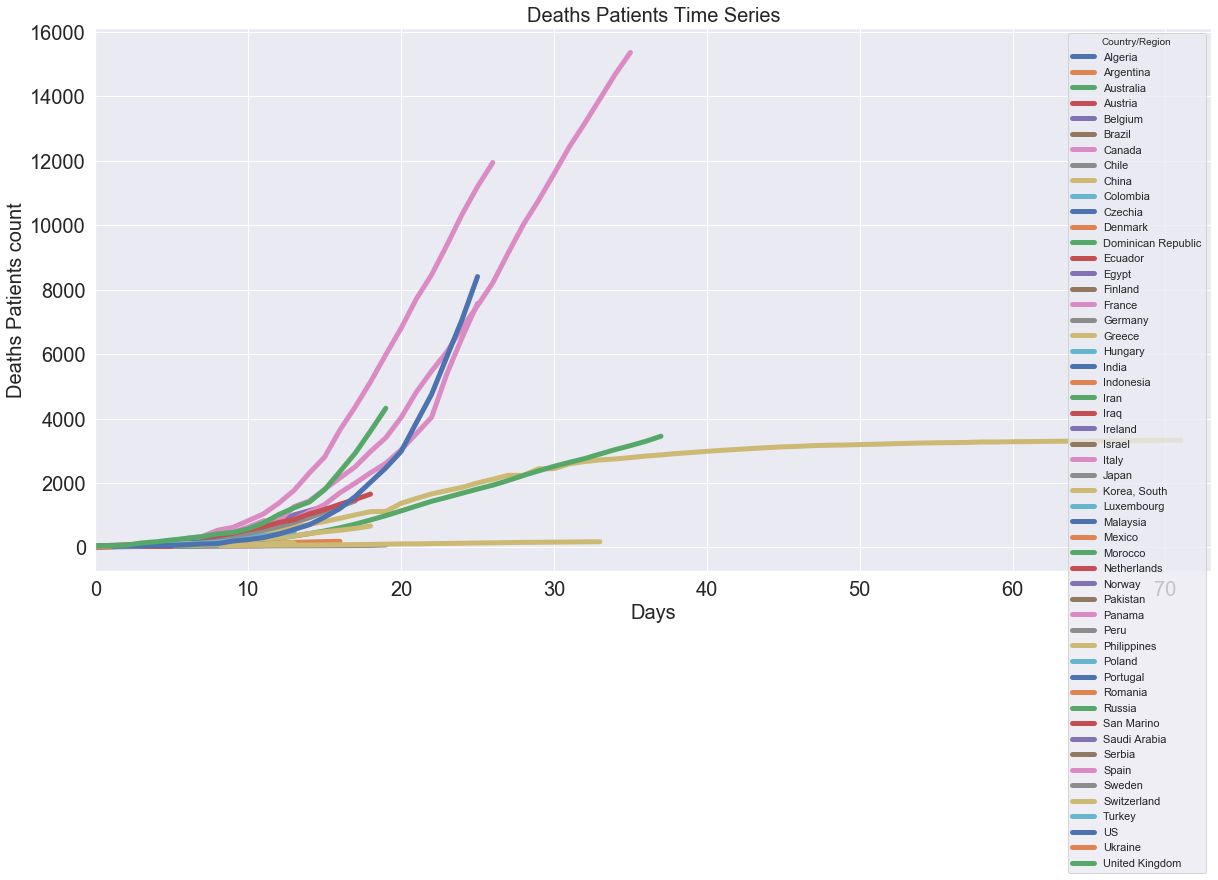

In [88]:
# Plot time series 
deaths.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Days', fontsize=20);
plt.ylabel('Deaths Patients count', fontsize=20);
plt.title('Deaths Patients Time Series', fontsize=20);

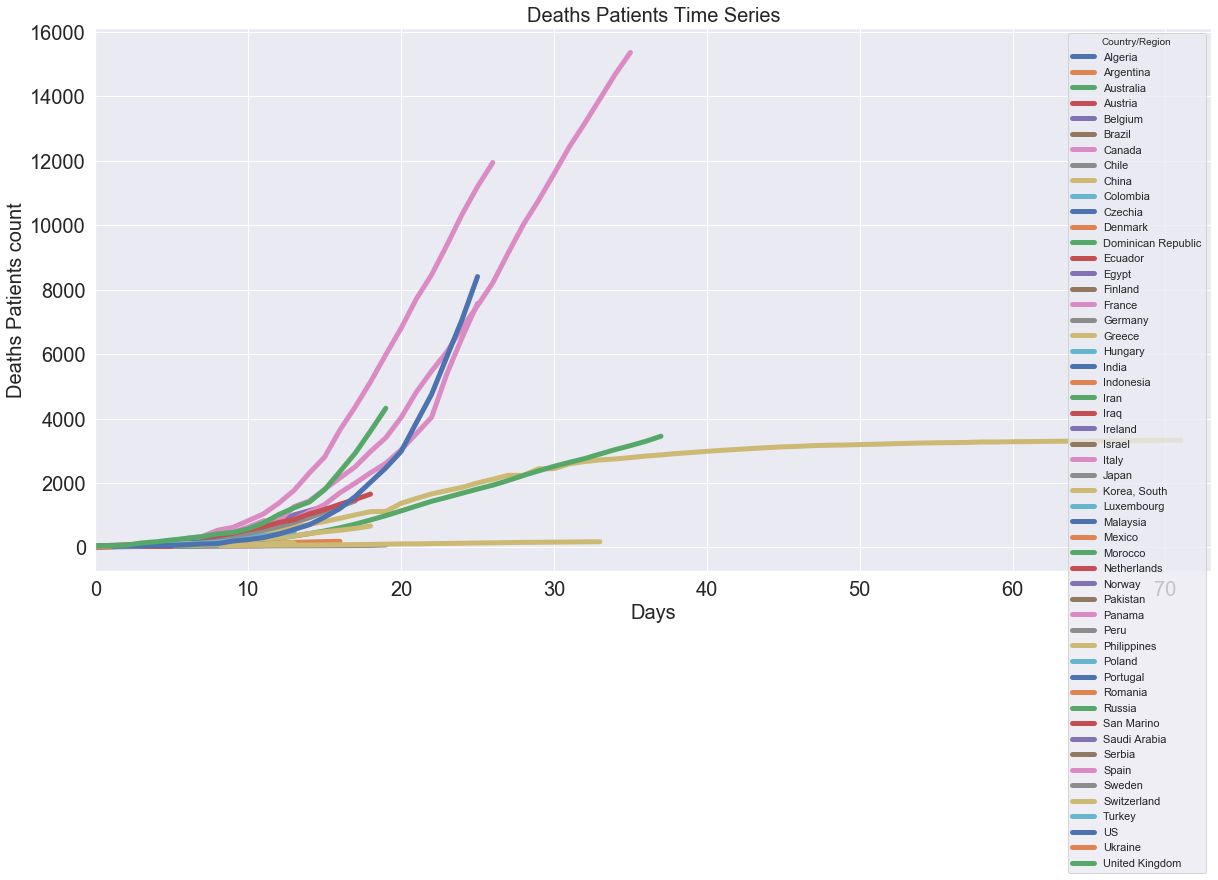

In [89]:
# Plot semi log time series 
deaths.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Days', fontsize=20);
plt.ylabel('Deaths Patients count', fontsize=20);
plt.title('Deaths Patients Time Series', fontsize=20);

## Functions

In [ ]:
# Function for grouping countries by region
def grouping_by_region(raw_data, min_val):
    data_day = raw_data.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)
    df_t = data_day.transpose()
    # Melt data so that it is long
    data = data_day.reset_index().melt(id_vars='Country/Region', var_name='date')
    #
    data.loc[(data.value < min_val),'value'] = None
    # Pivot data to wide & index by date
    df_t = data.pivot(index='date', columns='Country/Region', values='value')
    # Set index as DateTimeIndex
    datetime_index = pd.DatetimeIndex(df_t.index)
    df_t.set_index(datetime_index, inplace=True)
    return df_t

In [ ]:
# Function to plot time series of several countries of interest
def plot_time_series(df, plot_title, x_label, y_label, isLogY=False):
    df.plot(figsize=(20,10), linewidth=5, fontsize=20, logy=isLogY)
    plt.xlabel(x_label, fontsize=20);
    plt.ylabel(y_label, fontsize=20);
    plt.title(plot_title, fontsize=20);

In [ ]:
# Function to manipulate the data
def data_manipulation(df):
    df.dropna(axis=1, how='all', inplace=True)
    df = df.sort_index()
    df1 = df.reset_index().drop(['date'], axis=1)
    
    for col in df1.columns:
        print(col, df1[col].first_valid_index())
        df1[col] = df1[col].shift(-df1[col].first_valid_index())
        
    df2 = df1.apply(lambda x: x.shift(-x.first_valid_index()))
    return df2

## Recovered

In [ ]:
# Import data & check it out

raw_data_recovered.head()

In [ ]:
df = grouping_by_region(raw_data_recovered, 50)
df.tail()

In [ ]:
# Plot time series of several countries of interest
poi = ['China', 'US', 'Italy', 'France', 'Australia']
plot_time_series(df[poi], 'Recovered Patients Time Series', 'Date', 'Recovered Patients count', False)

In [ ]:
clean_df = data_manipulation(df)

In [ ]:
clean_df.head()

In [ ]:
plot_time_series(clean_df, 'Recovered Patients Time Series', 'Days', 'Recovered Patients count', False)

In [ ]:
plot_time_series(clean_df, 'Recovered Patients Logarithmic Time Series', 'Days', 'Recovered Patients Logarithmic count', True)

## Interactive plots with altair

[This](https://www.nytimes.com/interactive/2020/03/21/upshot/coronavirus-deaths-by-country.html) and [this](https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html).

In [ ]:
import altair as alt

In [ ]:
# melt data 
dfq = df2.reset_index().melt(id_vars='index')
dfq.head()

In [ ]:
# altair plot with hover tool
alt.Chart(dfq).mark_line(strokeWidth=4, opacity=0.9).encode(
    x=alt.X('index'),
    y=alt.Y('value', scale=alt.Scale(type='log')),
    color='Country/Region',
    tooltip=['Country/Region', 'index','value']
).properties(
    width=800,
    height=650
).interactive()


In [ ]:
dfq['Country'] = dfq['Country/Region']
selection = alt.selection_single(fields=['Country'])

color = alt.condition(selection,
                    alt.Color('Country:N'),
                    alt.value('lightgray'))

# altair plot with hover tool
base = alt.Chart(dfq).mark_line(strokeWidth=4, opacity=0.6).encode(
    x=alt.X('index'),
    y=alt.Y('value', scale=alt.Scale(type='log')),
    tooltip=['Country/Region:N', 'index','value']
).properties(
    width=800,
    height=650)


chart = base.encode(
  color=alt.condition(selection, 'Country:N', alt.value('lightgray'))
).add_selection(
  selection
)

overlay = base.encode(
    color='Country',
  opacity=alt.value(0.5),
  tooltip=['Country:N', 'Name:N']
).transform_filter(
  selection
)


chart + overlay

# check this out: https://github.com/altair-viz/altair/issues/1552

In [ ]:
# see here: https://altair-viz.github.io/gallery/multiple_interactions.html


# altair plot with hover tool
base = alt.Chart(dfq).mark_line(strokeWidth=4, opacity=0.9).encode(
    x=alt.X('index'),
    y=alt.Y('value', scale=alt.Scale(type='log')),
    color='Country/Region',
    tooltip=['Country/Region', 'index','value']
).properties(
    width=800,
    height=650
).interactive()




countries = list(set(dfq['Country/Region']))
#len(countries)
# A dropdown filter
country_dropdown = alt.binding_select(options=countries)

country_select = alt.selection_single(fields=['Country/Region'], bind=country_dropdown, name="Country")

filter_countries = base.add_selection(
    country_select
).transform_filter(
    country_select
).properties(title="Dropdown Filtering")

filter_countries

In [ ]:
# see here: https://altair-viz.github.io/user_guide/interactions.html
# under Input Element Binding


# altair plot with hover tool

countries = sorted(list(set(dfq['Country/Region'])))
#len(countries)
# A dropdown filter
country_dropdown = alt.binding_select(options=countries)

country_select = alt.selection_single(fields=['Country/Region'], bind=country_dropdown, name="Country")

color = alt.condition(country_select,
                    alt.Color('Country/Region:N'),
                    alt.value('lightgray'))
opacity = alt.condition(country_select, alt.value(1.0), alt.value(0.2))

alt.Chart(dfq).mark_line(strokeWidth=4, opacity=1.0).encode(
    x=alt.X('index'),
    y=alt.Y('value', scale=alt.Scale(type='log')),
    color=color,
    opacity=opacity,
    tooltip=['Country/Region:N', 'index','value']
).properties(
    width=800,
    height=650
).add_selection(
    country_select
).add_selection(country_select
               ).interactive()

# more possibilities extractable from here, HBA? https://altair-viz.github.io/gallery/multiline_tooltip.html

## Interactive plots with bokeh

In [ ]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnDataSource
output_notebook()

In [ ]:

source = ColumnDataSource(data=df2)

TOOLTIPS = [
    ("Country", "US"),
    ("Day", "$index"),
    ("Number dead", "$y"),
]

p = figure(tooltips=TOOLTIPS, y_axis_type="log")
p.line(x='index', y='US', line_width=3, source=source)
# show the results
show(p)

In [ ]:
from bokeh.palettes import Spectral6, magma
from bokeh.transform import factor_cmap

source = ColumnDataSource(data=dfq)

TOOLTIPS = [
    ("Country", "US"),
    ("Day", "$x"),
    ("Number dead", "$y"),
]

Countries = list(set(dfq['Country/Region']))

p = figure(tooltips=TOOLTIPS, y_axis_type="log")
p.line(x='index', y='value', line_width=4, source=source)
# show the results
show(p)